<a href="https://colab.research.google.com/github/radhakrishnan-omotec/omotec-repository/blob/main/Old_RK_Biological_Eye_C3AE_Notebook_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/radhakrishnan-omotec/biological_eye.git

Cloning into 'biological_eye'...
remote: Enumerating objects: 1248, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1248 (delta 5), reused 10 (delta 4), pack-reused 1236
Receiving objects: 100% (1248/1248), 73.78 MiB | 28.17 MiB/s, done.
Resolving deltas: 100% (133/133), done.
Updating files: 100% (1082/1082), done.


In [ ]:
#download imdb
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar
#download WIKI
#!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar

--2023-07-11 15:16:25--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7012157440 (6.5G) [application/x-tar]
Saving to: ‘imdb_crop.tar’

imdb_crop.tar       100%[===================>]   6.53G  26.7MB/s    in 4m 22s  

2023-07-11 15:20:47 (25.6 MB/s) - ‘imdb_crop.tar’ saved [7012157440/7012157440]



In [ ]:
#extract IMDB-WIKI datasets
#!tar -xvf /content/imdb_crop.tar -C /content/biological_eye/C3AE_keras/datasets/
!tar -xvf /content/wiki_crop.tar -C /content/biological_eye/C3AE_keras/datasets/
# morph data
# !tar -xvf Morph.tar -C /content/C3AE/dataset

Streaming output truncated to the last 5000 lines.
wiki_crop/92/30943192_1890-04-19_1954.jpg
wiki_crop/92/30949092_1943-11-23_1968.jpg
wiki_crop/92/30991792_1921-11-16_1954.jpg
wiki_crop/92/4096292_1970-02-17_2006.jpg
wiki_crop/92/709692_1958-05-03_2011.jpg
wiki_crop/92/909392_1959-02-09_2014.jpg
wiki_crop/92/11942292_1980-02-25_2009.jpg
wiki_crop/92/11955692_1955-09-10_1977.jpg
wiki_crop/92/2194592_1963-09-28_2007.jpg
wiki_crop/92/31935592_1931-08-31_1967.jpg
wiki_crop/92/31959792_1959-04-16_1984.jpg
wiki_crop/92/3196992_1977-07-08_2012.jpg
wiki_crop/92/41970292_1997-05-26_2012.jpg
wiki_crop/92/5194492_1983-04-02_2014.jpg
wiki_crop/92/1290492_1942-12-20_1997.jpg
wiki_crop/92/22989292_1983-07-01_2014.jpg
wiki_crop/92/32944792_1990-12-24_2013.jpg
wiki_crop/92/7297492_1980-07-12_2013.jpg
wiki_crop/92/13937192_1890-12-12_1970.jpg
wiki_crop/92/1399192_1967-12-06_2009.jpg
wiki_crop/92/2398292_1979-08-12_2011.jpg
wiki_crop/92/33928292_1982-02-14_2011.jpg
wiki_crop/92/149692_1973-07-15_2006.j

In [ ]:
cd /content/biological_eye/C3AE_keras

/content/biological_eye/C3AE_keras


In [ ]:
#Wiki-IDMB
!python /content/biological_eye/C3AE_keras/preprocessing_scripts/preprocess_WIKI-IMDB.py
#Morph
# !python /content/biological_eye/C3AE_keras/preprocessing_scripts/preprocess_Morph.py

/content/biological_eye/C3AE_keras/preprocessing_scripts/preprocess_WIKI-IMDB.py:124: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  image_buffer = buf.tostring()
0 images preprocessed
4 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/16/10002116_1971-05-31_2012.jpg
351 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/47/3001247_1985-09-30_2014.jpg
416 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/87/30064987_1992-11-19_2011.jpg
500 images preprocessed
597 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/20/70020_1896-01-20_1986.jpg
1049 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/50/31038450_1981-12-06_2015.jpg
1292 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/80/610980_1968-01-01_2008.jpg
1500 images preprocesse

In [ ]:
cd /content/biological_eye/C3AE_keras

/content/biological_eye/C3AE_keras


In [ ]:
!pip install feather-format

  Preparing metadata (setup.py) ... done
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2440 sha256=c3a21e4341ce73513c63b6970e68703a12403b3331622810984f2b2456c4de9b
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5ddef243c97f13c6cf579d7353d659e41a05c3a6
Successfully built feather-format


In [ ]:
from pathlib import Path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import dlib
from net_training import C3AE_net,training_utils
import feather
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau
from keras.losses import kl_divergence,mae
from keras.metrics import mae
import tensorflow as tf

In [ ]:
# initializing params
category = 10
dropout = 0.2
seed = 2019
category = category + 2
interval = 10

In [ ]:
# Loading dataset (from .feather file)
dataset_dir = Path('/content/biological_eye/C3AE_keras/datasets/wiki_crop/')
dataset_df = pd.DataFrame(columns=["age", "gender", "image", "org_box", "trible_box", "landmarks", "roll", "yaw", "pitch"])
for fnames in dataset_dir.glob('*.feather'):
  df_chunk = feather.read_dataframe(dataset_dir.joinpath(fnames))
  dataset_df = pd.concat([dataset_df,df_chunk],ignore_index=True)
dataset_df.shape

(30378, 12)

In [ ]:
#validation split using sklearn.model_selection.train_test_split
trainset, testset = train_test_split(dataset_df, train_size=0.8, test_size=0.2, random_state=seed)

In [ ]:
# making a generator for image and dataset. inside generator we
#load img, crop faces (3 sizes -> big,middle,small) then tranform (if aumentation is true) rotate,birhgt etc ect
# convert age into 2 point represenation (like on hot encoding)
input_imgs_shape = (64,64) # input image shape to network
batch_size = 32
require_data_augmentation = False # if this is true, then random noise will be added to images, e.g rotation, brightness, hue etc
train_gen = C3AE_net.preprocessing(trainset,batch_size=batch_size, category=category, interval=interval,input_imgs_shape=input_imgs_shape,augmentation=require_data_augmentation,dropout=dropout)
validation_gen = C3AE_net.preprocessing(testset, augmentation=require_data_augmentation, category=category, interval=interval)
print(trainset.groupby(["age"])["age"].agg("count"))

age
1.0      2
3.0      2
5.0      2
6.0      6
7.0      5
        ..
95.0     4
96.0     5
98.0     3
99.0     5
100.0    6
Name: age, Length: 97, dtype: int64


In [ ]:
#checking generator working fine!
index = 10
for i in train_gen:
  print(i[1][0][index],i[1][1][index])
  break

26.0 [0.  0.  0.4 0.6 0.  0.  0.  0.  0.  0.  0.  0. ]


In [ ]:
# just to check how versatile is our dataset
# get distribution of ages i.e how many number of rows for each interval i.e lets say for 0-10 years age we have 5000 entries(rows)
age_distribution = [trainset["age"][(trainset.age >= x -10) & (trainset.age <= x)].count() for x in range(10, 101, 10)]
age_distribution = [age_distribution[0]] + age_distribution + [age_distribution[-1]]
print(age_distribution)

[36, 36, 1715, 8717, 5683, 3951, 3059, 1951, 1026, 438, 101, 101]


In [ ]:
se_net = True # if true, then network will contain SE_Block (GAP + FC + mul), which improved results.
using_white_norm = True # if true, then network will contain white_normlization block, which will normalize image brightness and colors. (for better accuracy)
models = C3AE_net.build_net(Categories = category, using_SE=se_net, using_white_norm=using_white_norm)

# add pretrain weights if exist
pretrain_weights_path = Path("/content/biological_eye/C3AE_keras/models_saved/wiki_trained__age_mae_7.7194.h5")
if Path.is_file(pretrain_weights_path):
  models.load_weights(pretrain_weights_path)

In [ ]:
lr = 0.1
adam = Adam(lr=lr)
#cate_weight = K.variable(params.weight_factor)
weight_factor = 10
models.compile(
    optimizer=adam,
    loss = {'W1':kl_divergence,'age':mae},
    metrics={"age": mae},
    loss_weights={'W1':weight_factor, 'age': 1}
)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
class lr_Callback(tf.keras.callbacks.Callback):
  def on_epoch_begin(self, batch, logs={}):
      # Get the current learning rate from model's optimizer.
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      print('current epoch lr is: {} '.format(lr))

In [ ]:
save_path = '/content/biological_eye/C3AE_keras/models_saved/'
callbacks = [
  ModelCheckpoint(save_path+'WIKI-weights.{epoch:02d}-{val_age_mean_absolute_error:.2f}.hdf5',
                  monitor='val_age_mean_absolute_error',
                  verbose = 1,
                  save_best_only=True,
                  model ='min'),

  ReduceLROnPlateau(monitor='val_age_mean_absolute_error', #considered metric
                    factor = 0.5, # learning_rate * factor (multiply lr 0.5 to reduce it by 50%)
                    patience = 2,# if loss didnt improve this much epochs, then update lr
                    min_delta = 0.01, # if model didnt improve this much
                    cooldown = 1, # after lr updated, wait this many epochs before apply new lr
                    min_lr = 0.001, # lower limit of lr
                    mode = 'min'), # loss should go up (max) or down (min)
  lr_Callback() # print lr on each epoch, to analyze lr performance.
]
### print("callbacks completed")

callbacks completed


In [ ]:
epochs=2
history = models.fit(train_gen, steps_per_epoch=len(trainset) / batch_size, epochs=epochs, callbacks=callbacks, validation_data=validation_gen, validation_steps=len(testset) / batch_size * 3)

current epoch lr is: 0.10000000149011612 
Epoch 1/2
760/759 [==============================] - ETA: 0s - loss: 17.2105 - age_loss: 7.6731 - W1_loss: 0.9537 - age_mean_absolute_error: 7.6731
Epoch 1: val_age_mean_absolute_error improved from inf to 8.18896, saving model to /content/biological_eye/C3AE_keras/models_saved/WIKI-weights.01-8.19.hdf5
759/759 [==============================] - 724s 946ms/step - loss: 17.2105 - age_loss: 7.6731 - W1_loss: 0.9537 - age_mean_absolute_error: 7.6731 - val_loss: 18.1899 - val_age_loss: 8.1890 - val_W1_loss: 1.0001 - val_age_mean_absolute_error: 8.1890 - lr: 0.1000
current epoch lr is: 0.10000000149011612 
Epoch 2/2
760/759 [==============================] - ETA: 0s - loss: 17.0072 - age_loss: 7.5798 - W1_loss: 0.9427 - age_mean_absolute_error: 7.5798
Epoch 2: val_age_mean_absolute_error improved from 8.18896 to 8.02155, saving model to /content/biological_eye/C3AE_keras/models_saved/WIKI-weights.02-8.02.hdf5
759/759 [==============================]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'age_loss', 'W1_loss', 'age_mean_absolute_error', 'val_loss', 'val_age_loss', 'val_W1_loss', 'val_age_mean_absolute_error', 'lr'])


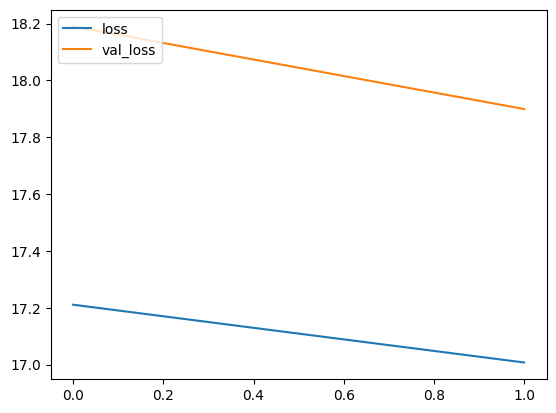

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

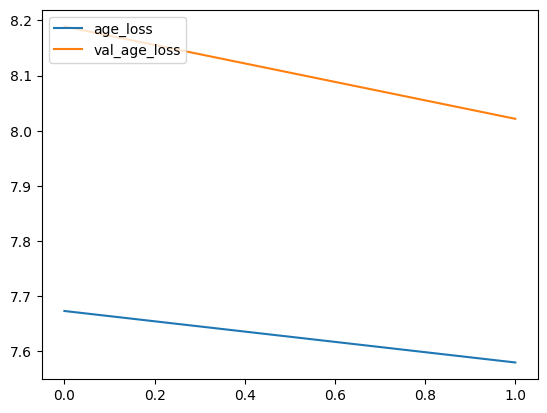

In [ ]:
plt.plot(history.history['age_loss'])
plt.plot(history.history['val_age_loss'])
plt.legend(['age_loss', 'val_age_loss'], loc='upper left')
plt.show()

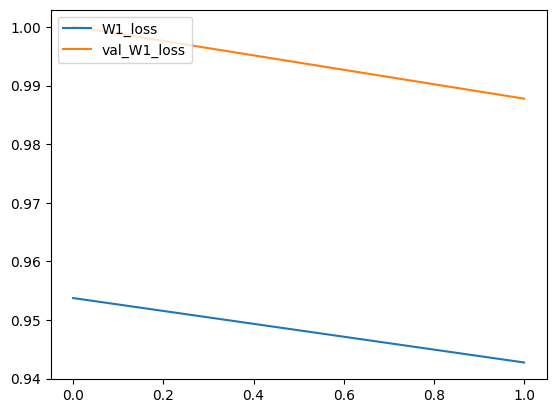

In [ ]:
plt.plot(history.history['W1_loss'])
plt.plot(history.history['val_W1_loss'])
plt.legend(['W1_loss', 'val_W1_loss'], loc='upper left')
plt.show()

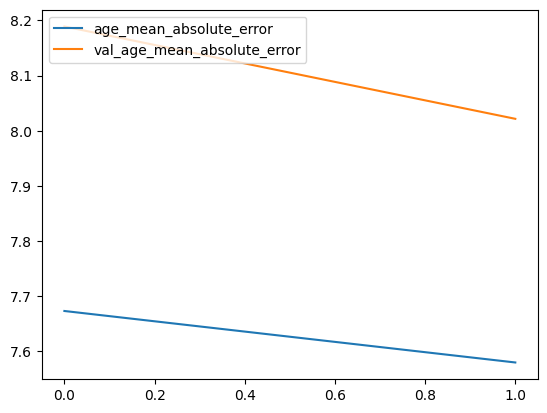

In [ ]:
plt.plot(history.history['age_mean_absolute_error'])
plt.plot(history.history['val_age_mean_absolute_error'])
plt.legend(['age_mean_absolute_error', 'val_age_mean_absolute_error'], loc='upper left')
plt.show()

# **Inference**

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/biological_eye/C3AE_keras/detector/shape_predictor_68_face_landmarks.dat")
def gen_face(image):
  face_rect_list = detector(image)
  xmin, ymin, xmax, ymax = face_rect_list[0].left() , face_rect_list[0].top(), face_rect_list[0].right(), face_rect_list[0].bottom() # face_rect is dlib.rectangle object, so extracting values from it
  lmarks_list = dlib.full_object_detections()
  for face_rect in face_rect_list:
    lmarks_list.append(predictor(image, face_rect)) # getting landmarks as a list of objects
  return np.array([xmin, ymin, xmax, ymax]), lmarks_list

def gen_boundbox(box, landmark):
    # getting 3 boxes for face, as required in paper... i.e feed 3 different sized images to network (R,G,B)
    xmin, ymin, xmax, ymax = box # box is [xmin, ymin, xmax, ymax]
    w, h = xmax - xmin, ymax - ymin
    nose_x, nose_y = (landmark.parts()[30].x, landmark.parts()[30].y) # calculating nose center point, so the triple boxes will be cropped according to nose point
    w_h_margin = abs(w - h)
    top2nose = nose_y - ymin
    # Contains the smallest frame
    return np.array([
        [(xmin - w_h_margin, ymin - w_h_margin), (xmax + w_h_margin, ymax + w_h_margin)],  # out
        [(nose_x - top2nose, nose_y - top2nose), (nose_x + top2nose, nose_y + top2nose)],  # middle
        [(nose_x - w//2, nose_y - w//2), (nose_x + w//2, nose_y + w//2)]  # inner box
    ])

In [38]:
img = cv2.imread('/content/biological_eye/C3AE_keras/test/test.png',)
model = models

In [39]:
img = cv2.imread('/content/biological_eye/C3AE_keras/test/old_test.jpg',)
model = models

In [40]:
###cv2.imshow('/content/biological_eye/C3AE_keras/test/test.png')
print(img.shape)

(401, 612, 3)


In [41]:
try:
    bounds, lmarks = gen_face(img)
except Exception as e:
  print(e)

padding = 200
new_bd_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_CONSTANT)

In [42]:
###cv2.imshow(new_bd_img)
print(new_bd_img.shape)

(801, 1012, 3)


In [43]:
for pidx,landmarks in enumerate(lmarks):
    trible_box = gen_boundbox(bounds, landmarks)
    tri_imgs = []
    for bbox in trible_box:
        bbox = bbox
        h_min, w_min = bbox[0]
        h_max, w_max = bbox[1]
        cropped_resized_img = cv2.resize(new_bd_img[w_min:w_max, h_min:h_max], (64, 64))
        final_img = np.expand_dims(cropped_resized_img,axis=0)
        tri_imgs.append(final_img)
    print(np.array(tri_imgs).shape)

(3, 1, 64, 64, 3)


In [44]:
result = models.predict(tri_imgs)

1/1 [==============================] - 0s 31ms/step


In [45]:
print("RESULT is ", result)

RESULT is  [array([[67.78637]], dtype=float32), array([[9.5066271e-04, 1.0625632e-03, 4.4338601e-03, 8.0054905e-03,
        2.7919950e-02, 5.2781213e-02, 2.7524033e-01, 3.8470978e-01,
        1.4224635e-01, 6.7529492e-02, 3.5120327e-02, 3.0700950e-12]],
      dtype=float32)]


In [46]:
print("Age is: ",result[0][0][0])

Age is:  67.78637
